## Set-up

In [1]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 393 µs (started: 2022-12-04 17:56:53 +08:00)


In [2]:
# check python version
# lensinggw package requires python 3.8+

! python --version

Python 3.9.13
time: 131 ms (started: 2022-12-04 17:56:53 +08:00)


In [3]:
# lenstronomy github
# https://github.com/gipagano/lenstronomy.git

# lensinggw gitlab
# https://gitlab.com/gpagano/lensinggw.git

time: 438 µs (started: 2022-12-04 17:56:54 +08:00)


In [4]:
# import libraries and packages

import random
import matplotlib.pyplot as plt
import numpy as np
import configparser
import pandas as pd

from lensinggw.utils.utils import param_processing

time: 1.45 s (started: 2022-12-04 17:56:54 +08:00)


In [5]:
# cd to lenstronomy location
%cd /Users/genebelinario/Documents/dnc_research/thesis/notebooks
!ls

# install lenstronomy
#!git clone https://github.com/gipagano/lenstronomy.git
%cd /Users/genebelinario/Documents/dnc_research/thesis/notebooks/lenstronomy
!ls

# cd back to notebook
%cd /Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw
!ls

/Users/genebelinario/Documents/dnc_research/thesis/notebooks
LOSC_Event_tutorial-master lenstronomy_solver.ipynb
gw_microlensing.ipynb      near_source.ipynb
lensed_gw.ipynb            plots.ipynb
lensed_unlensed_gw.ipynb   source_0.png
lensinggw                  source_1.png
lensinggw_setup.ipynb      source_2.png
lenstronomy
/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lenstronomy
AFFILIATEDPACKAGES.rst MANIFEST.in            setup.cfg
AUTHORS.rst            Makefile               setup.py
CONTRIBUTING.rst       PUBLISHED.rst          test
Gemfile                README.rst             test_helper.rb
HISTORY.rst            docs                   tox.ini
LICENSE                lenstronomy
MAILINGLIST.rst        requirements.txt
/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw
LICENSE            build              lensinggw          setup.py
MANIFEST.in        dist               lensinggw.egg-info
README.rst         docs               requirements.t

## Macroimages Input Parameters

In [10]:
# input parameters
lens_mass = [float("{:e}".format(10**n)) for n in [6,13]]     # galaxy mass range 10**7 to 10**12 solar masses
lens_mass.sort()

zS = [2.0]*len(lens_mass)
zL = [0.5]*len(lens_mass)
source_ra = [0]*len(lens_mass)
source_dec = [0.5]*len(np.unique(lens_mass))
lens_ra = [0]*len(lens_mass)
lens_dec = [0]*len(lens_mass)
thetaE = [param_processing(zL[x], zS[x], lens_mass[x]) for x in np.arange(0,len(lens_mass))]

input_macro_dict={"lens_mass":lens_mass,
       "zS": zS,
       'zL': zL,
       'source_ra':source_ra,
       'source_dec': source_dec,
       'lens_ra': lens_ra,
       'lens_dec': lens_dec,
       'thetaE': thetaE}

input_macro = pd.DataFrame(data=input_macro_dict)

pd.set_option('display.max_columns', None)
display(input_params)

input_macro.to_csv("/Users/genebelinario/Documents/dnc_research/thesis/master_files/input_macro.csv")

,lens_mass,zS,zL,source_ra,source_dec,lens_ra,lens_dec,thetaE
0,1.000000e+06,2.0,0.5,0,0.5,0,0,9.808815e-09
1,1.000000e+13,2.0,0.5,0,0.5,0,0,3.101819e-05


time: 17.4 ms (started: 2022-12-04 17:58:27 +08:00)


In [11]:
# output for lensing of gravitational waves
output_macro = pd.read_csv("/Users/genebelinario/Documents/dnc_research/thesis/master_files/input_macro.csv", index_col=[0])

for n in np.arange(0,4):
    output_macro['macro'+str(n)+'_ra'] = ''

for n in np.arange(0,4):
    output_macro['macro'+str(n)+'_dec'] = ''

for n in np.arange(0,4):
    output_macro['macro_td'+str(n)] = ''

for n in np.arange(0,4):
    output_macro['macro_mag'+str(n)] = ''

for n in np.arange(0,4):
    output_macro['macro_morse'+str(n)] = ''

pd.set_option('display.max_columns', None)
display(output_macro)

,lens_mass,zS,zL,source_ra,source_dec,lens_ra,lens_dec,thetaE,macro0_ra,macro1_ra,macro2_ra,macro3_ra,macro0_dec,macro1_dec,macro2_dec,macro3_dec,macro_td0,macro_td1,macro_td2,macro_td3,macro_mag0,macro_mag1,macro_mag2,macro_mag3,macro_morse0,macro_morse1,macro_morse2,macro_morse3
0,1.000000e+06,2.0,0.5,0,0.5,0,0,9.808815e-09,,,,,,,,,,,,,,,,,,,,
1,1.000000e+13,2.0,0.5,0,0.5,0,0,3.101819e-05,,,,,,,,,,,,,,,,,,,,


time: 27.1 ms (started: 2022-12-04 17:58:50 +08:00)


## Macroimage Positions

In [14]:
input_macro = pd.read_csv("/Users/genebelinario/Documents/dnc_research/thesis/master_files/input_macro.csv", index_col=[0])

display(input_macro)

,lens_mass,zS,zL,source_ra,source_dec,lens_ra,lens_dec,thetaE
0,1.000000e+06,2.0,0.5,0,0.5,0,0,9.808815e-09
1,1.000000e+13,2.0,0.5,0,0.5,0,0,3.101819e-05


time: 9.56 ms (started: 2022-12-04 17:59:24 +08:00)


In [15]:
# load input parameters
input_macro = pd.read_csv("/Users/genebelinario/Documents/dnc_research/thesis/master_files/input_macro.csv", index_col=[0])

# images vs SIE mass
for n in np.arange(0, len(input_macro.index)):

    # coordinates, first define them in scaled units [x (radians) /thetaE_tot]
    y0,y1 = input_macro['source_ra'][n], input_params['source_dec'][n]

    # redshifts                                                                                                                  
    zS = input_macro["zS"][n]
    zL = input_macro["zL"][n]

    # masses 
    mSIE = input_macro['lens_mass'][n]
    
    # convert to radians
    from lensinggw.utils.utils import param_processing
                                                                                                                             
    thetaE_SIE  = param_processing(zL, zS, mSIE)    
    beta0,beta1 = y0*thetaE_SIE, y1*thetaE_SIE                                                 
                                                                                              

    # lens model
    lens_model_list     = ['SIE']
    kwargs_SIE         = {"center_x":0.0, 'center_y':0.0, 'theta_E':thetaE_SIE, 'e1':-0.081, 'e2':0}
    kwargs_lens_list    = [kwargs_SIE]   

    # indicate the first lens as macromodel and solve with the two-step procedure
    from lensinggw.solver.images import microimages

    solver_kwargs = {'SearchWindowMacro': 4*thetaE_SIE,
                 'OnlyMacro': True,
                 'MacroIndex':[0],
                "Optimization": True,
                    "PixelsMacro": 10**3}   

    MacroImg_ra, MacroImg_dec, pixel_width  = microimages(source_pos_x    = beta0,
                                                                       source_pos_y    = beta1,
                                                                       lens_model_list = lens_model_list,
                                                                       kwargs_lens     = kwargs_lens_list,
                                                                       **solver_kwargs)                                                            
                                                                       
    # time delays, magnifications, Morse indices and amplification factor
    from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
    from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification

    tds = TimeDelay(MacroImg_ra, MacroImg_dec,
                beta0, beta1,
                zL, zS,
                lens_model_list, kwargs_lens_list)                
    mus = magnifications(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list)
    ns  = getMinMaxSaddle(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list) 
                
    print('Time delays (seconds): ', tds)
    print('magnifications: ',  mus)
    print('Morse indices: ',ns)

    dummy_frequencies = np.linspace(0,10,11)
    F = geometricalOpticsMagnification(dummy_frequencies,
                                   MacroImg_ra,MacroImg_dec,
                                   beta0,beta1,
                                   zL,zS,
                                   lens_model_list,
                                   kwargs_lens_list)
    print('Geometrical optics amplification factor:', F)

    for x in np.arange(0, len(MacroImg_ra)):
        output_macro.at[n, 'macro'+str(x)+'_ra'] = "{:e}".format(MacroImg_ra[x])
        output_macro.at[n, 'macro'+str(x)+'_dec'] = "{:e}".format(MacroImg_dec[x])
        output_macro.at[n, 'macro_td'+str(x)] = tds[x]
        output_macro.at[n, 'macro_mag'+str(x)] = mus[x]
        output_macro.at[n, 'macro_morse'+str(x)] = ns[x]   


---- Will perform only the macromodel analysis ----

---- Solver settings ----

The macromodel analysis will be performed with the following settings:

OnlyMacro                       --> True
Scaled                          --> False
SearchWindowMacro               --> 3.923525804117745e-08
PixelsMacro                     --> 1000
OverlapDistMacro                --> 1e-15
NearSource                      --> False
Optimization                    --> True
Verbose                         --> False
OptimizationWindowMacro         --> 2
OptimizationPixelsMacro         --> 30
MinDistMacro                    --> None
ImprovementMacro                --> None
OptimizationPrecisionLimitMacro --> 1e-20




MACROIMAGES

ra: [ 7.64953018e-21 -4.96308526e-24 -4.96308526e-24]
dec: [ 1.43606231e-08 -4.39823477e-09 -1.56357004e-10]

Time delays (seconds):  [ 0.         28.34730176 30.476578  ]
magnifications:  [ 3.80591423e+00 -7.70297588e-01  1.19870864e-03]
Morse indices:  [0, 0.5, 1]
Geometrical o

In [16]:
# check changes in output 
display(output_macro)

output_macro.to_csv("/Users/genebelinario/Documents/dnc_research/thesis/master_files/output_macro.csv")

,lens_mass,zS,zL,source_ra,source_dec,lens_ra,lens_dec,thetaE,macro0_ra,macro1_ra,macro2_ra,macro3_ra,macro0_dec,macro1_dec,macro2_dec,macro3_dec,macro_td0,macro_td1,macro_td2,macro_td3,macro_mag0,macro_mag1,macro_mag2,macro_mag3,macro_morse0,macro_morse1,macro_morse2,macro_morse3
0,1.000000e+06,2.0,0.5,0,0.5,0,0,9.808815e-09,7.649530e-21,-4.963085e-24,-4.963085e-24,,1.436062e-08,-4.398235e-09,-1.563570e-10,,0.0,28.347302,30.476578,,3.805914,-0.770298,0.001199,,0,0.5,1,
1,1.000000e+13,2.0,0.5,0,0.5,0,0,3.101819e-05,6.750718e-21,-7.593361e-21,,,-1.461058e-05,4.562892e-05,,,286969691.327059,0.0,,,-0.76776,3.806292,,,0.5,0,,


time: 22.7 ms (started: 2022-12-04 18:10:12 +08:00)


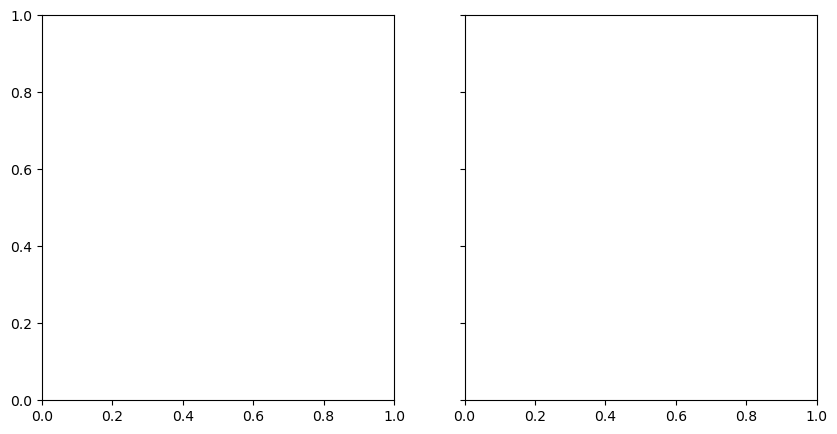

time: 100 ms (started: 2022-12-04 20:46:36 +08:00)


In [31]:
## sky plot

# plot specification
nr = 1
nc = 2

## parametrized curves

epsilon = 0.15
t = np.arange(0, 2*np.pi, 0.001)

# inner caustics
beta_1_in = (2*epsilon/np.sqrt(1-epsilon))*((np.cos(t))**3)
beta_2_in = (2*epsilon/np.sqrt(1+epsilon))*((np.sin(t))**3)

# outer caustics
beta_1_out = ((1-epsilon)/np.sqrt(1-epsilon))*np.cos(t)
beta_2_out = ((1+epsilon)/np.sqrt(1+epsilon))*np.sin(t)

# critical curve
rho = 1 + epsilon*np.cos(2*t)
theta_1 = (1-epsilon)**(-1)*rho*np.cos(t)
theta_2 = (1+epsilon)**(-1)*rho*np.sin(t)

fig, axs = plt.subplots(nrows=nr, ncols=nc, sharey=True, sharex=True, figsize=(10,5))

